# Importando Bibliotecas

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, classification_report
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Importando dados

In [8]:
df = pd.read_csv('dataset_churn.csv')

In [3]:
df.head()

,Score Crédito,Estado,Gênero,Idade,Tempo como cliente (meses),Saldo,Número de produtos,Possui Cartao de Crédito,Assina mensalidade,Renda Mensal Presumida (R$),Churn_2_meses
0,619,São Paulo,Feminino,42,2,0.00,1,1,1,4222.870000,1
1,608,Rio de Janeiro,Feminino,41,1,83807.86,1,0,1,4689.274167,0
2,502,São Paulo,Feminino,42,8,159660.80,3,1,0,4747.148750,1
3,699,São Paulo,Feminino,39,1,0.00,2,0,0,3909.442917,0
4,850,Rio de Janeiro,Feminino,43,2,125510.82,1,1,1,3295.170833,0


# Verificando dados nulos ou faltantes

In [ ]:
df.isnull().sum()

Score Crédito                  0
Estado                         0
Gênero                         0
Idade                          0
Tempo como cliente (meses)     0
Saldo                          0
Número de produtos             0
Possui Cartao de Crédito       0
Assina mensalidade             0
Renda Mensal Presumida (R$)    0
Churn_2_meses                  0
dtype: int64

In [ ]:
df.isna().sum()

Score Crédito                  0
Estado                         0
Gênero                         0
Idade                          0
Tempo como cliente (meses)     0
Saldo                          0
Número de produtos             0
Possui Cartao de Crédito       0
Assina mensalidade             0
Renda Mensal Presumida (R$)    0
Churn_2_meses                  0
dtype: int64

# Verificando a taxa de Churn
    -contar o número de cancelamentos nos ultimos 2 meses;
    -gerar taxa de Churn para futura análise;

In [4]:
df.Churn_2_meses.value_counts()

0    7963
1    2037
Name: Churn_2_meses, dtype: int64

In [ ]:
tx_churn = 2037 / (7963 + 2037)
tx_churn

0.2037

In [ ]:
print(f'A taxa de Churn atual é de {tx_churn*100:.2f}%')

A taxa de Churn atual é de 20.37%


# Tratando dados categóricos

    -Trataremos os dados categóricos do data frame, facilitando a futura modelagem.
    -Usamos o drop first para que já seja feita a eliminação de uma das colunas booleanas a serem inseridas no data frame   com o get_dummies, minimizando a quantidade de códigos.

In [9]:
df_dum = pd.get_dummies(df, columns = ['Estado', 'Gênero'], drop_first= True)

In [ ]:
df_dum.head()

,Score Crédito,Idade,Tempo como cliente (meses),Saldo,Número de produtos,Possui Cartao de Crédito,Assina mensalidade,Renda Mensal Presumida (R$),Churn_2_meses,Estado_Rio de Janeiro,Estado_São Paulo,Gênero_Masculino
0,619,42,2,0.00,1,1,1,4222.870000,1,0,1,0
1,608,41,1,83807.86,1,0,1,4689.274167,0,1,0,0
2,502,42,8,159660.80,3,1,0,4747.148750,1,0,1,0
3,699,39,1,0.00,2,0,0,3909.442917,0,0,1,0
4,850,43,2,125510.82,1,1,1,3295.170833,0,1,0,0


# Análisando dados
    -Por serem poucas variaveis, estaremos analisando uma a uma conforme demonstrado abaixo

## Score de Crédito
    -Sabendo que o score de crédito do serasa vai de 0 - 1000 tudo parece ok;

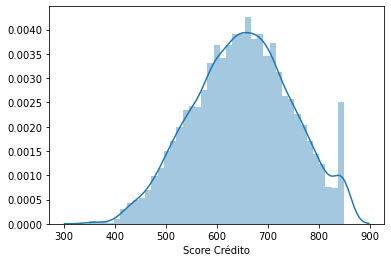

In [129]:
sns.distplot(df_dum['Score Crédito'])

In [ ]:
df_dum[ df_dum['Score Crédito'] > 800].max()

Score Crédito                     850.00000
Idade                              81.00000
Tempo como cliente (meses)         10.00000
Saldo                          212778.20000
Número de produtos                  4.00000
Possui Cartao de Crédito            1.00000
Assina mensalidade                  1.00000
Renda Mensal Presumida (R$)      8323.98625
Churn_2_meses                       1.00000
Estado_Rio de Janeiro               1.00000
Estado_São Paulo                    1.00000
Gênero_Masculino                    1.00000
dtype: float64

In [ ]:
df_dum[ df_dum['Score Crédito'] > 800].min()

Score Crédito                  801.000000
Idade                           18.000000
Tempo como cliente (meses)       0.000000
Saldo                            0.000000
Número de produtos               1.000000
Possui Cartao de Crédito         0.000000
Assina mensalidade               0.000000
Renda Mensal Presumida (R$)      7.424583
Churn_2_meses                    0.000000
Estado_Rio de Janeiro            0.000000
Estado_São Paulo                 0.000000
Gênero_Masculino                 0.000000
dtype: float64

## Idade
    -Aparentemente não temos nenhum Conde Drácula;
    -Por conta de ser um banco novo o publico acima dos 60 anos é bem reduzido;

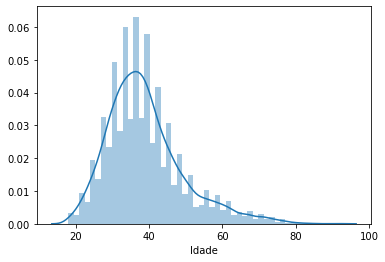

In [43]:
sns.distplot(df_dum['Idade'])

## Saldo
    -Pela quantidade de contas zeradas, temos indicios de que a inatividade da conta talvez sejá um fator para o aumento do Churn

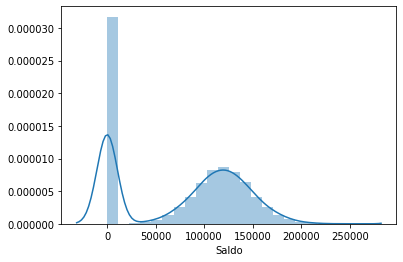

In [ ]:
sns.distplot(df_dum.Saldo)

## Número de produtos
    -Podemos ver que todas as contas sem excessão consomem no minimo 01 produto, mas como podemos ver abaixo, a taxa de Churn são:
        -01 Produto  = 38.34% (5084 Contas)
        -02 Produtos =  8.20% (4590 Contas)
        -03 Prdotuos = 20.91% (266 Contas)
        
    -Podemos considerar que talvez, ter pelo menos 02 produtos fornecidos a um cliente poderia aumentar o engajamento a         plataforma

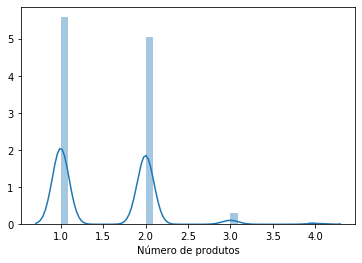

In [ ]:
sns.distplot(df_dum['Número de produtos'])

In [ ]:
df_dum['Número de produtos'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Número de produtos, dtype: int64

In [ ]:
num_produtos01 = df_dum[df_dum['Número de produtos'] == 1]
num_produtos01.head()

num_produtos01['Churn_2_meses'].value_counts()

0    3675
1    1409
Name: Churn_2_meses, dtype: int64

In [ ]:
print(f'Contas que consomem 01 produto tem a taxa de Churn de {(1409/3675)*100:.2f}%')

Contas que consomem 01 produto tem a taxa de Churn de 38.34%


In [ ]:
num_produtos01 = df_dum[df_dum['Número de produtos'] == 2]
num_produtos01.head()

num_produtos01['Churn_2_meses'].value_counts()

0    4242
1     348
Name: Churn_2_meses, dtype: int64

In [ ]:
print(f'Contas que consomem 02 produto tem a taxa de Churn de {(348/4242)*100:.2f}%')

Contas que consomem 02 produto tem a taxa de Churn de 8.20%


In [ ]:
num_produtos01 = df_dum[df_dum['Número de produtos'] == 3]
num_produtos01.head()

num_produtos01['Churn_2_meses'].value_counts()

1    220
0     46
Name: Churn_2_meses, dtype: int64

In [ ]:
print(f'Contas que consomem 02 produto tem a taxa de Churn de {(46/220)*100:.2f}%')

Contas que consomem 02 produto tem a taxa de Churn de 20.91%


## Renda Mensal
    -Podemos que as faixas salariais parecem reais, sem outliers

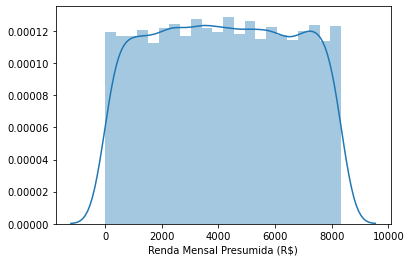

In [11]:
sns.distplot(df_dum['Renda Mensal Presumida (R$)'])

## Verificando corelação de variaveis
    -Aparentemente a Idade e o Saldo são variaveis mais relacionada com o churn
    -Verificamos que quanto mais velha a pessoa, maior o indie de chunr
    
    entre 18 e 22 anos, a taxa de churn é de 5.97%
    entre 23 e 49 anos, a taxa de chrun é de 19.7%
    acima dos 50 anos, a taxa de chunr é de 81%

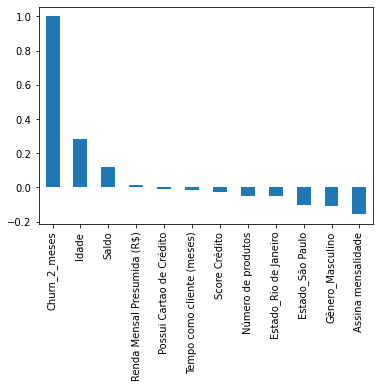

In [13]:
df_dum.corr()['Churn_2_meses'].sort_values(ascending = False).plot(kind='bar')

In [16]:
df_dum.Idade.max()

92

In [18]:
classes = [18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 92]

In [40]:
#até 22 anos, a taxa de churn é de 5.97%
df_dum[df_dum['Idade'] < 22]['Churn_2_meses'].value_counts()

0    134
1      8
Name: Churn_2_meses, dtype: int64

In [49]:
#entre 23 e 49 anos, a taxa de chrun é de 19.7%
df_dum[22<df_dum.Idade][df_dum.Idade < 50]['Churn_2_meses'].value_counts()

<ipython-input-49-5b4d1fac3862>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dum[22<df_dum.Idade][df_dum.Idade < 50]['Churn_2_meses'].value_counts()


0    6996
1    1383
Name: Churn_2_meses, dtype: int64

In [52]:
#acima dos 50 anos, a taxa de chunr é de 81%
df_dum[df_dum.Idade > 50]['Churn_2_meses'].value_counts()

0    698
1    563
Name: Churn_2_meses, dtype: int64

# Separando em bases de treino e teste

-O p valor de todas as variaveis é bem alto, com excessão do tempo como cliente e ter cartão, por tanto iremos dropar essas colunas

In [15]:
y = df_dum.Churn_2_meses
x = df_dum.drop('Churn_2_meses', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=42, stratify=y)

In [138]:
x_train_sm = sm.add_constant(x_train)
lr_sm = GLM(y_train, x_train_sm, family=sm.families.Binomial()).fit()
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Churn_2_meses   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7488
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3236.8
Date:                Wed, 07 Oct 2020   Deviance:                       6473.6
Time:                        00:09:51   Pearson chi2:                 7.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.3909      0.291     -8.229      0.000      -2.960      -1.821
Score Crédito                  -0.0009      0.000     -2.858      0.004      -0.002      -0.000
Idade                           0.0686      0.003     23.556      0.000       0.063       0.074
Tempo como cliente (meses)     -0.0015      0.011     -0.137      0.891      -0.023       0.020
Saldo                        2.569e-06   5.93e-07      4.331      0.000    1.41e-06    3.73e-06
Número de produtos             -0.0979      0.054     -1.799      0.072      -0.205       0.009
Possui Cartao de Crédito       -0.0632      0.068     -0.927      0.354      -0.197       0.070
Assina mensalidade             -1.0255      0.066    -15.544      0.000      -1.155      -0.896
Renda Mensal Presumida (R$)  2.415e-05   1.31e-05      1.841      0.066   -1.57e-06    4.99e-05
Estado_Rio de Janeiro          -0.7789      0.090     -8.649      0.000      -0.955      -0.602
Estado_São Paulo               -0.8151      0.078    -10.456      0.000      -0.968      -0.662
Gênero_Masculino               -0.5163      0.063     -8.249      0.000      -0.639      -0.394
===============================================================================================
"""

In [143]:
y = df_dum.Churn_2_meses
x = df_dum.drop(['Churn_2_meses','Tempo como cliente (meses)', 'Possui Cartao de Crédito'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=42, stratify=y)

In [144]:
x_train_sm = sm.add_constant(x_train)
lr_sm = GLM(y_train, x_train_sm, family=sm.families.Binomial()).fit()
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Churn_2_meses   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7490
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3237.3
Date:                Wed, 07 Oct 2020   Deviance:                       6474.5
Time:                        00:12:25   Pearson chi2:                 7.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4470      0.281     -8.696      0.000      -2.999      -1.895
Score Crédito                  -0.0009      0.000     -2.846      0.004      -0.002      -0.000
Idade                           0.0686      0.003     23.568      0.000       0.063       0.074
Saldo                        2.576e-06   5.93e-07      4.343      0.000    1.41e-06    3.74e-06
Número de produtos             -0.0984      0.054     -1.809      0.071      -0.205       0.008
Assina mensalidade             -1.0244      0.066    -15.543      0.000      -1.154      -0.895
Renda Mensal Presumida (R$)   2.41e-05   1.31e-05      1.837      0.066   -1.61e-06    4.98e-05
Estado_Rio de Janeiro          -0.7769      0.090     -8.630      0.000      -0.953      -0.600
Estado_São Paulo               -0.8142      0.078    -10.446      0.000      -0.967      -0.661
Gênero_Masculino               -0.5163      0.063     -8.249      0.000      -0.639      -0.394
===============================================================================================
"""

# Testando Modelos ╭( ͡° ͜ʖ ͡°)و

## Regressão Logistica
Por ser um problema binário vamos testar a regressão logistica.

Obtivemos resultados péssimo, por tanto iremos testar outro modelo.

In [145]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

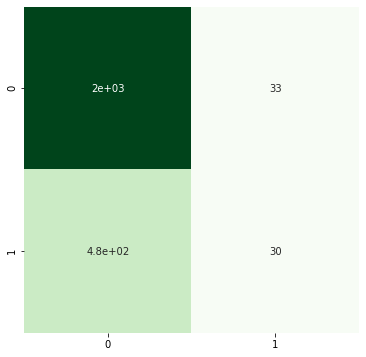

In [146]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, cmap='Greens', cbar=False);

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1991
           1       0.48      0.06      0.10       509

    accuracy                           0.80      2500
   macro avg       0.64      0.52      0.49      2500
weighted avg       0.74      0.80      0.73      2500



## Random Forest
Obtivemos resultados melhores, que a regressão, contudo ainda não satisfatórios, iremos testar por tanto mais um modelo.

In [28]:
dt = DecisionTreeClassifier()

In [32]:
modelo = RandomForestClassifier(n_estimators = 2500,
                                max_samples = 0.6,
                                max_features = 0.5) 

modelo.fit(x_train, y_train)

RandomForestClassifier(max_features=0.5, max_samples=0.6, n_estimators=2500)

In [30]:
y_pred_forest = modelo.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.78      0.48      0.59       509

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.85      2500



## Catboost

In [10]:
y = df.Churn_2_meses
x = df.drop('Churn_2_meses', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=42, stratify=y)

In [20]:
len(y_train)

7500

In [11]:
mod_cat = CatBoostClassifier(iterations= 2500, learning_rate= 0.1)

In [12]:
x_train.select_dtypes(include= 'O')

,Estado,Gênero
5866,São Paulo,Feminino
1938,São Paulo,Masculino
4194,Minas Gerais,Feminino
6332,São Paulo,Feminino
1,Rio de Janeiro,Feminino
...,...,...
3254,Minas Gerais,Masculino
4644,Rio de Janeiro,Masculino
8942,São Paulo,Feminino
2935,Rio de Janeiro,Masculino


In [13]:
mod_cat.fit(x_train, y_train, cat_features=['Estado', 'Gênero'])

0:	learn: 0.6185504	total: 81.6ms	remaining: 3m 23s
1:	learn: 0.5608321	total: 107ms	remaining: 2m 13s
2:	learn: 0.5216504	total: 132ms	remaining: 1m 49s
3:	learn: 0.4870880	total: 158ms	remaining: 1m 38s
4:	learn: 0.4566147	total: 177ms	remaining: 1m 28s
5:	learn: 0.4377678	total: 193ms	remaining: 1m 20s
6:	learn: 0.4228188	total: 215ms	remaining: 1m 16s
7:	learn: 0.4063233	total: 235ms	remaining: 1m 13s
8:	learn: 0.3935044	total: 251ms	remaining: 1m 9s
9:	learn: 0.3825749	total: 271ms	remaining: 1m 7s
10:	learn: 0.3738964	total: 287ms	remaining: 1m 5s
11:	learn: 0.3710386	total: 306ms	remaining: 1m 3s
12:	learn: 0.3660481	total: 333ms	remaining: 1m 3s
13:	learn: 0.3616691	total: 355ms	remaining: 1m 2s
14:	learn: 0.3580546	total: 371ms	remaining: 1m 1s
15:	learn: 0.3548566	total: 396ms	remaining: 1m 1s
16:	learn: 0.3510705	total: 412ms	remaining: 1m
17:	learn: 0.3486818	total: 433ms	remaining: 59.8s
18:	learn: 0.3454647	total: 453ms	remaining: 59.2s
19:	learn: 0.3436521	total: 477ms	r

165:	learn: 0.2655261	total: 3.66s	remaining: 51.5s
166:	learn: 0.2649130	total: 3.68s	remaining: 51.5s
167:	learn: 0.2645529	total: 3.71s	remaining: 51.6s
168:	learn: 0.2643340	total: 3.73s	remaining: 51.4s
169:	learn: 0.2638074	total: 3.75s	remaining: 51.4s
170:	learn: 0.2632851	total: 3.77s	remaining: 51.4s
171:	learn: 0.2630220	total: 3.8s	remaining: 51.4s
172:	learn: 0.2625500	total: 3.82s	remaining: 51.4s
173:	learn: 0.2621707	total: 3.84s	remaining: 51.4s
174:	learn: 0.2618797	total: 3.86s	remaining: 51.3s
175:	learn: 0.2614850	total: 3.88s	remaining: 51.3s
176:	learn: 0.2611685	total: 3.9s	remaining: 51.2s
177:	learn: 0.2608738	total: 3.92s	remaining: 51.2s
178:	learn: 0.2603343	total: 3.95s	remaining: 51.2s
179:	learn: 0.2601485	total: 3.96s	remaining: 51.1s
180:	learn: 0.2598324	total: 3.99s	remaining: 51.1s
181:	learn: 0.2596364	total: 4.01s	remaining: 51.1s
182:	learn: 0.2593809	total: 4.04s	remaining: 51.1s
183:	learn: 0.2589434	total: 4.07s	remaining: 51.2s
184:	learn: 0.

327:	learn: 0.2145360	total: 7.57s	remaining: 50.2s
328:	learn: 0.2143309	total: 7.6s	remaining: 50.1s
329:	learn: 0.2140575	total: 7.62s	remaining: 50.1s
330:	learn: 0.2139080	total: 7.64s	remaining: 50.1s
331:	learn: 0.2137320	total: 7.66s	remaining: 50s
332:	learn: 0.2135696	total: 7.68s	remaining: 50s
333:	learn: 0.2131976	total: 7.7s	remaining: 50s
334:	learn: 0.2130120	total: 7.73s	remaining: 49.9s
335:	learn: 0.2128051	total: 7.75s	remaining: 49.9s
336:	learn: 0.2126513	total: 7.78s	remaining: 49.9s
337:	learn: 0.2123118	total: 7.8s	remaining: 49.9s
338:	learn: 0.2120204	total: 7.83s	remaining: 49.9s
339:	learn: 0.2116034	total: 7.85s	remaining: 49.9s
340:	learn: 0.2112741	total: 7.88s	remaining: 49.9s
341:	learn: 0.2107934	total: 7.91s	remaining: 49.9s
342:	learn: 0.2107755	total: 7.93s	remaining: 49.9s
343:	learn: 0.2106892	total: 7.95s	remaining: 49.8s
344:	learn: 0.2102866	total: 7.97s	remaining: 49.8s
345:	learn: 0.2100732	total: 8s	remaining: 49.8s
346:	learn: 0.2096967	to

489:	learn: 0.1777265	total: 11.4s	remaining: 46.9s
490:	learn: 0.1773908	total: 11.5s	remaining: 46.9s
491:	learn: 0.1772225	total: 11.5s	remaining: 46.8s
492:	learn: 0.1770969	total: 11.5s	remaining: 46.8s
493:	learn: 0.1769698	total: 11.5s	remaining: 46.8s
494:	learn: 0.1768356	total: 11.6s	remaining: 46.8s
495:	learn: 0.1767334	total: 11.6s	remaining: 46.8s
496:	learn: 0.1764107	total: 11.6s	remaining: 46.8s
497:	learn: 0.1761358	total: 11.6s	remaining: 46.8s
498:	learn: 0.1759970	total: 11.7s	remaining: 46.8s
499:	learn: 0.1757926	total: 11.7s	remaining: 46.7s
500:	learn: 0.1756000	total: 11.7s	remaining: 46.7s
501:	learn: 0.1754304	total: 11.7s	remaining: 46.7s
502:	learn: 0.1753602	total: 11.8s	remaining: 46.7s
503:	learn: 0.1753323	total: 11.8s	remaining: 46.7s
504:	learn: 0.1751032	total: 11.8s	remaining: 46.7s
505:	learn: 0.1749525	total: 11.8s	remaining: 46.7s
506:	learn: 0.1748253	total: 11.9s	remaining: 46.7s
507:	learn: 0.1746840	total: 11.9s	remaining: 46.6s
508:	learn: 

652:	learn: 0.1496032	total: 15.3s	remaining: 43.4s
653:	learn: 0.1495466	total: 15.4s	remaining: 43.3s
654:	learn: 0.1494629	total: 15.4s	remaining: 43.3s
655:	learn: 0.1492472	total: 15.4s	remaining: 43.3s
656:	learn: 0.1491420	total: 15.4s	remaining: 43.3s
657:	learn: 0.1489705	total: 15.4s	remaining: 43.2s
658:	learn: 0.1487860	total: 15.5s	remaining: 43.2s
659:	learn: 0.1486192	total: 15.5s	remaining: 43.2s
660:	learn: 0.1484333	total: 15.5s	remaining: 43.2s
661:	learn: 0.1482998	total: 15.5s	remaining: 43.1s
662:	learn: 0.1481357	total: 15.6s	remaining: 43.1s
663:	learn: 0.1479439	total: 15.6s	remaining: 43.1s
664:	learn: 0.1478742	total: 15.6s	remaining: 43.1s
665:	learn: 0.1477672	total: 15.6s	remaining: 43.1s
666:	learn: 0.1475161	total: 15.7s	remaining: 43s
667:	learn: 0.1473062	total: 15.7s	remaining: 43s
668:	learn: 0.1471562	total: 15.7s	remaining: 43s
669:	learn: 0.1468615	total: 15.7s	remaining: 43s
670:	learn: 0.1467519	total: 15.8s	remaining: 43s
671:	learn: 0.1466698	

813:	learn: 0.1272477	total: 19.6s	remaining: 40.5s
814:	learn: 0.1271128	total: 19.6s	remaining: 40.5s
815:	learn: 0.1270031	total: 19.6s	remaining: 40.5s
816:	learn: 0.1268211	total: 19.6s	remaining: 40.4s
817:	learn: 0.1266683	total: 19.7s	remaining: 40.4s
818:	learn: 0.1266227	total: 19.7s	remaining: 40.4s
819:	learn: 0.1265275	total: 19.7s	remaining: 40.3s
820:	learn: 0.1264298	total: 19.7s	remaining: 40.3s
821:	learn: 0.1262797	total: 19.7s	remaining: 40.3s
822:	learn: 0.1261212	total: 19.8s	remaining: 40.3s
823:	learn: 0.1260258	total: 19.8s	remaining: 40.2s
824:	learn: 0.1259367	total: 19.8s	remaining: 40.2s
825:	learn: 0.1257410	total: 19.8s	remaining: 40.2s
826:	learn: 0.1256137	total: 19.9s	remaining: 40.2s
827:	learn: 0.1255243	total: 19.9s	remaining: 40.1s
828:	learn: 0.1253326	total: 19.9s	remaining: 40.1s
829:	learn: 0.1251323	total: 19.9s	remaining: 40.1s
830:	learn: 0.1249661	total: 19.9s	remaining: 40.1s
831:	learn: 0.1247607	total: 20s	remaining: 40s
832:	learn: 0.12

977:	learn: 0.1085269	total: 23.9s	remaining: 37.1s
978:	learn: 0.1084477	total: 23.9s	remaining: 37.1s
979:	learn: 0.1083968	total: 23.9s	remaining: 37.1s
980:	learn: 0.1083404	total: 23.9s	remaining: 37.1s
981:	learn: 0.1082414	total: 24s	remaining: 37s
982:	learn: 0.1081565	total: 24s	remaining: 37s
983:	learn: 0.1080973	total: 24s	remaining: 37s
984:	learn: 0.1079372	total: 24s	remaining: 37s
985:	learn: 0.1078279	total: 24.1s	remaining: 36.9s
986:	learn: 0.1077212	total: 24.1s	remaining: 36.9s
987:	learn: 0.1076188	total: 24.1s	remaining: 36.9s
988:	learn: 0.1074973	total: 24.1s	remaining: 36.9s
989:	learn: 0.1073533	total: 24.1s	remaining: 36.8s
990:	learn: 0.1072834	total: 24.2s	remaining: 36.8s
991:	learn: 0.1071327	total: 24.2s	remaining: 36.8s
992:	learn: 0.1069063	total: 24.2s	remaining: 36.7s
993:	learn: 0.1068245	total: 24.2s	remaining: 36.7s
994:	learn: 0.1067245	total: 24.3s	remaining: 36.7s
995:	learn: 0.1066637	total: 24.3s	remaining: 36.7s
996:	learn: 0.1065889	total:

1136:	learn: 0.0930643	total: 27.7s	remaining: 33.3s
1137:	learn: 0.0929922	total: 27.8s	remaining: 33.2s
1138:	learn: 0.0929464	total: 27.8s	remaining: 33.2s
1139:	learn: 0.0928960	total: 27.8s	remaining: 33.2s
1140:	learn: 0.0928165	total: 27.8s	remaining: 33.2s
1141:	learn: 0.0926295	total: 27.9s	remaining: 33.1s
1142:	learn: 0.0925201	total: 27.9s	remaining: 33.1s
1143:	learn: 0.0924606	total: 27.9s	remaining: 33.1s
1144:	learn: 0.0923512	total: 27.9s	remaining: 33.1s
1145:	learn: 0.0922562	total: 28s	remaining: 33s
1146:	learn: 0.0922228	total: 28s	remaining: 33s
1147:	learn: 0.0921085	total: 28s	remaining: 33s
1148:	learn: 0.0920518	total: 28s	remaining: 32.9s
1149:	learn: 0.0919577	total: 28s	remaining: 32.9s
1150:	learn: 0.0918893	total: 28.1s	remaining: 32.9s
1151:	learn: 0.0917374	total: 28.1s	remaining: 32.9s
1152:	learn: 0.0916283	total: 28.1s	remaining: 32.8s
1153:	learn: 0.0915528	total: 28.1s	remaining: 32.8s
1154:	learn: 0.0914550	total: 28.2s	remaining: 32.8s
1155:	lea

1299:	learn: 0.0794004	total: 31.5s	remaining: 29s
1300:	learn: 0.0793873	total: 31.5s	remaining: 29s
1301:	learn: 0.0793197	total: 31.5s	remaining: 29s
1302:	learn: 0.0791838	total: 31.5s	remaining: 28.9s
1303:	learn: 0.0791065	total: 31.5s	remaining: 28.9s
1304:	learn: 0.0790670	total: 31.6s	remaining: 28.9s
1305:	learn: 0.0789512	total: 31.6s	remaining: 28.9s
1306:	learn: 0.0788551	total: 31.6s	remaining: 28.8s
1307:	learn: 0.0787946	total: 31.6s	remaining: 28.8s
1308:	learn: 0.0787180	total: 31.6s	remaining: 28.8s
1309:	learn: 0.0786498	total: 31.7s	remaining: 28.8s
1310:	learn: 0.0785719	total: 31.7s	remaining: 28.7s
1311:	learn: 0.0785220	total: 31.7s	remaining: 28.7s
1312:	learn: 0.0785037	total: 31.7s	remaining: 28.7s
1313:	learn: 0.0784805	total: 31.8s	remaining: 28.7s
1314:	learn: 0.0784173	total: 31.8s	remaining: 28.6s
1315:	learn: 0.0783273	total: 31.8s	remaining: 28.6s
1316:	learn: 0.0782185	total: 31.8s	remaining: 28.6s
1317:	learn: 0.0781682	total: 31.8s	remaining: 28.6s

1456:	learn: 0.0694236	total: 35.1s	remaining: 25.1s
1457:	learn: 0.0693838	total: 35.1s	remaining: 25.1s
1458:	learn: 0.0693403	total: 35.2s	remaining: 25.1s
1459:	learn: 0.0693291	total: 35.2s	remaining: 25.1s
1460:	learn: 0.0692783	total: 35.2s	remaining: 25s
1461:	learn: 0.0692271	total: 35.2s	remaining: 25s
1462:	learn: 0.0691380	total: 35.3s	remaining: 25s
1463:	learn: 0.0690936	total: 35.3s	remaining: 25s
1464:	learn: 0.0690488	total: 35.3s	remaining: 25s
1465:	learn: 0.0690357	total: 35.4s	remaining: 24.9s
1466:	learn: 0.0690168	total: 35.4s	remaining: 24.9s
1467:	learn: 0.0689749	total: 35.4s	remaining: 24.9s
1468:	learn: 0.0689527	total: 35.4s	remaining: 24.9s
1469:	learn: 0.0688933	total: 35.5s	remaining: 24.8s
1470:	learn: 0.0688095	total: 35.5s	remaining: 24.8s
1471:	learn: 0.0687763	total: 35.5s	remaining: 24.8s
1472:	learn: 0.0687276	total: 35.5s	remaining: 24.8s
1473:	learn: 0.0686735	total: 35.6s	remaining: 24.7s
1474:	learn: 0.0685864	total: 35.6s	remaining: 24.7s
147

1613:	learn: 0.0621203	total: 39.2s	remaining: 21.5s
1614:	learn: 0.0620915	total: 39.2s	remaining: 21.5s
1615:	learn: 0.0620531	total: 39.2s	remaining: 21.5s
1616:	learn: 0.0620108	total: 39.2s	remaining: 21.4s
1617:	learn: 0.0619811	total: 39.3s	remaining: 21.4s
1618:	learn: 0.0619327	total: 39.3s	remaining: 21.4s
1619:	learn: 0.0619122	total: 39.3s	remaining: 21.4s
1620:	learn: 0.0618687	total: 39.3s	remaining: 21.3s
1621:	learn: 0.0618392	total: 39.4s	remaining: 21.3s
1622:	learn: 0.0617416	total: 39.4s	remaining: 21.3s
1623:	learn: 0.0617384	total: 39.4s	remaining: 21.3s
1624:	learn: 0.0616561	total: 39.4s	remaining: 21.2s
1625:	learn: 0.0616368	total: 39.5s	remaining: 21.2s
1626:	learn: 0.0615765	total: 39.5s	remaining: 21.2s
1627:	learn: 0.0614451	total: 39.5s	remaining: 21.2s
1628:	learn: 0.0613834	total: 39.5s	remaining: 21.1s
1629:	learn: 0.0613370	total: 39.6s	remaining: 21.1s
1630:	learn: 0.0612829	total: 39.6s	remaining: 21.1s
1631:	learn: 0.0611605	total: 39.6s	remaining:

1775:	learn: 0.0547917	total: 43.1s	remaining: 17.6s
1776:	learn: 0.0547326	total: 43.1s	remaining: 17.5s
1777:	learn: 0.0547123	total: 43.1s	remaining: 17.5s
1778:	learn: 0.0546711	total: 43.1s	remaining: 17.5s
1779:	learn: 0.0545762	total: 43.1s	remaining: 17.5s
1780:	learn: 0.0545432	total: 43.2s	remaining: 17.4s
1781:	learn: 0.0545267	total: 43.2s	remaining: 17.4s
1782:	learn: 0.0545202	total: 43.2s	remaining: 17.4s
1783:	learn: 0.0544934	total: 43.2s	remaining: 17.4s
1784:	learn: 0.0544057	total: 43.3s	remaining: 17.3s
1785:	learn: 0.0543628	total: 43.3s	remaining: 17.3s
1786:	learn: 0.0542908	total: 43.3s	remaining: 17.3s
1787:	learn: 0.0542421	total: 43.3s	remaining: 17.3s
1788:	learn: 0.0542223	total: 43.3s	remaining: 17.2s
1789:	learn: 0.0542137	total: 43.4s	remaining: 17.2s
1790:	learn: 0.0541973	total: 43.4s	remaining: 17.2s
1791:	learn: 0.0541437	total: 43.4s	remaining: 17.1s
1792:	learn: 0.0540973	total: 43.4s	remaining: 17.1s
1793:	learn: 0.0540662	total: 43.4s	remaining:

1939:	learn: 0.0485242	total: 46.8s	remaining: 13.5s
1940:	learn: 0.0484809	total: 46.8s	remaining: 13.5s
1941:	learn: 0.0484179	total: 46.9s	remaining: 13.5s
1942:	learn: 0.0483943	total: 46.9s	remaining: 13.4s
1943:	learn: 0.0483532	total: 46.9s	remaining: 13.4s
1944:	learn: 0.0483021	total: 46.9s	remaining: 13.4s
1945:	learn: 0.0482470	total: 46.9s	remaining: 13.4s
1946:	learn: 0.0481936	total: 47s	remaining: 13.3s
1947:	learn: 0.0481872	total: 47s	remaining: 13.3s
1948:	learn: 0.0481585	total: 47s	remaining: 13.3s
1949:	learn: 0.0481215	total: 47s	remaining: 13.3s
1950:	learn: 0.0480891	total: 47.1s	remaining: 13.2s
1951:	learn: 0.0480658	total: 47.1s	remaining: 13.2s
1952:	learn: 0.0480384	total: 47.1s	remaining: 13.2s
1953:	learn: 0.0479917	total: 47.1s	remaining: 13.2s
1954:	learn: 0.0479603	total: 47.2s	remaining: 13.1s
1955:	learn: 0.0479392	total: 47.2s	remaining: 13.1s
1956:	learn: 0.0479155	total: 47.2s	remaining: 13.1s
1957:	learn: 0.0478904	total: 47.2s	remaining: 13.1s
1

2095:	learn: 0.0437593	total: 50.4s	remaining: 9.71s
2096:	learn: 0.0437359	total: 50.4s	remaining: 9.69s
2097:	learn: 0.0437196	total: 50.4s	remaining: 9.66s
2098:	learn: 0.0436749	total: 50.5s	remaining: 9.64s
2099:	learn: 0.0436578	total: 50.5s	remaining: 9.62s
2100:	learn: 0.0436255	total: 50.5s	remaining: 9.59s
2101:	learn: 0.0436078	total: 50.5s	remaining: 9.57s
2102:	learn: 0.0435851	total: 50.5s	remaining: 9.54s
2103:	learn: 0.0435617	total: 50.6s	remaining: 9.52s
2104:	learn: 0.0435494	total: 50.6s	remaining: 9.49s
2105:	learn: 0.0434880	total: 50.6s	remaining: 9.47s
2106:	learn: 0.0434699	total: 50.6s	remaining: 9.44s
2107:	learn: 0.0434606	total: 50.6s	remaining: 9.42s
2108:	learn: 0.0434323	total: 50.7s	remaining: 9.39s
2109:	learn: 0.0434004	total: 50.7s	remaining: 9.37s
2110:	learn: 0.0433500	total: 50.7s	remaining: 9.35s
2111:	learn: 0.0433196	total: 50.7s	remaining: 9.32s
2112:	learn: 0.0433196	total: 50.7s	remaining: 9.29s
2113:	learn: 0.0433093	total: 50.8s	remaining:

2255:	learn: 0.0394604	total: 54s	remaining: 5.84s
2256:	learn: 0.0394265	total: 54s	remaining: 5.82s
2257:	learn: 0.0393933	total: 54s	remaining: 5.79s
2258:	learn: 0.0393725	total: 54.1s	remaining: 5.77s
2259:	learn: 0.0393180	total: 54.1s	remaining: 5.74s
2260:	learn: 0.0393099	total: 54.1s	remaining: 5.72s
2261:	learn: 0.0392819	total: 54.1s	remaining: 5.7s
2262:	learn: 0.0392493	total: 54.2s	remaining: 5.67s
2263:	learn: 0.0392220	total: 54.2s	remaining: 5.65s
2264:	learn: 0.0391948	total: 54.2s	remaining: 5.62s
2265:	learn: 0.0391606	total: 54.2s	remaining: 5.6s
2266:	learn: 0.0390996	total: 54.3s	remaining: 5.58s
2267:	learn: 0.0390824	total: 54.3s	remaining: 5.55s
2268:	learn: 0.0390645	total: 54.3s	remaining: 5.53s
2269:	learn: 0.0390468	total: 54.3s	remaining: 5.5s
2270:	learn: 0.0390131	total: 54.3s	remaining: 5.48s
2271:	learn: 0.0389869	total: 54.4s	remaining: 5.46s
2272:	learn: 0.0389431	total: 54.4s	remaining: 5.43s
2273:	learn: 0.0389142	total: 54.4s	remaining: 5.41s
22

2416:	learn: 0.0354225	total: 57.5s	remaining: 1.98s
2417:	learn: 0.0353721	total: 57.6s	remaining: 1.95s
2418:	learn: 0.0353436	total: 57.6s	remaining: 1.93s
2419:	learn: 0.0353249	total: 57.6s	remaining: 1.9s
2420:	learn: 0.0352987	total: 57.6s	remaining: 1.88s
2421:	learn: 0.0352803	total: 57.7s	remaining: 1.86s
2422:	learn: 0.0352450	total: 57.7s	remaining: 1.83s
2423:	learn: 0.0352139	total: 57.7s	remaining: 1.81s
2424:	learn: 0.0351944	total: 57.7s	remaining: 1.78s
2425:	learn: 0.0351544	total: 57.7s	remaining: 1.76s
2426:	learn: 0.0351443	total: 57.8s	remaining: 1.74s
2427:	learn: 0.0351354	total: 57.8s	remaining: 1.71s
2428:	learn: 0.0351168	total: 57.8s	remaining: 1.69s
2429:	learn: 0.0351048	total: 57.8s	remaining: 1.67s
2430:	learn: 0.0350879	total: 57.9s	remaining: 1.64s
2431:	learn: 0.0350748	total: 57.9s	remaining: 1.62s
2432:	learn: 0.0350582	total: 57.9s	remaining: 1.59s
2433:	learn: 0.0350485	total: 57.9s	remaining: 1.57s
2434:	learn: 0.0350282	total: 57.9s	remaining: 

In [14]:
y_pred_cat = mod_cat.predict(x_test)

In [15]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1991
           1       0.70      0.50      0.58       509

    accuracy                           0.85      2500
   macro avg       0.79      0.72      0.75      2500
weighted avg       0.84      0.85      0.84      2500



## Implementando grid search

tentar random search

In [20]:
params = {'iterations': [500],
          'depth': [4, 5, 6, 10],
          'l2_leaf_reg': np.logspace(0, 1, 10),
          'leaf_estimation_iterations': [10],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

In [17]:
scorer = make_scorer(accuracy_score)

In [18]:
mod_cat_grid = GridSearchCV(estimator=mod_cat, param_grid=params, scoring=scorer, cv=5)

In [ ]:
y_pred_cat_grid = mod_cat_grid.fit(x_train, y_train, cat_features=['Estado', 'Gênero'])

In [75]:
grid_pred = y_pred_cat_grid.predict(x_test)

In [76]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1991
           1       0.66      0.50      0.57       509

    accuracy                           0.85      2500
   macro avg       0.77      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500



## Comparando Modelos

In [78]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1991
           1       0.68      0.50      0.58       509

    accuracy                           0.85      2500
   macro avg       0.78      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [79]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1991
           1       0.66      0.50      0.57       509

    accuracy                           0.85      2500
   macro avg       0.77      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500

